# Projet de Data Mining - Spotify

#### Import des librairies

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

#### Chargement des données

In [2]:
playlists_df = pd.read_csv('playlists.data', sep="\t")
tracks_df = pd.read_csv('tracks.data', sep="\t")

## 1. Préparation des données

### 1.1 Création de variables

##### Prévisualisation des données

In [3]:
playlists_df.head(5)

,position,title,artists,url,date,playlist
0,1,La marcheuse,Christine and the Queens,https://www.spotontrack.com/track/la-marcheuse...,2018-09-26,fr
1,2,Mojo,Claire Laffut,https://www.spotontrack.com/track/mojo/43473376,2018-09-26,fr
2,3,Julien,Damso,https://www.spotontrack.com/track/julien/41177241,2018-09-26,fr
3,4,Baisers vol\u00e9s,The Pirouettes,https://www.spotontrack.com/track/baisers-vole...,2018-09-26,fr
4,5,\u00c0 la folie - Rework,Juliette Armanet,https://www.spotontrack.com/track/a-la-folie-r...,2018-09-26,fr


In [4]:
tracks_df.head(5)

,url,BPM,Key,Mode,Danceability,Valence,Energy,Acousticness,Instrumentalness,Liveness,Speechiness
0,https://www.spotontrack.com/track/eres/42205629,127,C#,Major,80,78,59,0,85,8,5
1,https://www.spotontrack.com/track/rise-dirty-d...,120,C,Major,81,62,71,0,88,6,6
2,https://www.spotontrack.com/track/hipcats/3809...,122,C,Major,88,85,98,0,4,2,6
3,https://www.spotontrack.com/track/the-review/4...,122,G,Major,80,27,66,6,85,7,6
4,https://www.spotontrack.com/track/dre/41836600,123,A#,Minor,73,27,75,0,87,6,4


##### Vérification de la dimension des données

In [5]:
def data_dimension(dataframe):
    nb_samples, nb_fields = dataframe.shape
    print("{} records of {} fields : {}".format(nb_samples, nb_fields, ', '.join(list(dataframe.columns))))

data_dimension(playlists_df)

29980 records of 6 fields : position, title, artists, url, date, playlist


In [6]:
playlist_names = list(playlists_df.playlist.unique())
print(playlists_df.groupby("playlist").size())

playlist
electro    6914
fr         4310
jazz       7606
lovepop    4615
metal      6535
dtype: int64


In [7]:
#pl_idx = playlists[playlists['position']==1].index
#pl_time = np.split(playlists, playlits_idx)
#br = genres[p]['title'].value_counts().rename_axis('title').reset_index(name='broadcasting_time') 

##### Extraction des playlists

<i>
Pour chaque chanson dans une playlist, calculez les nouvelles variables suivantes :

1. la position-pic (meilleure position) obtenue par la chanson dans la playlist,
2. un indicateur binaire qui vaut 1 si la chanson a une position-pic inférieure à 15,
3. la durée pendant laquelle la chanson est apparue dans la playlist (en nombre de semaines),
4. la position moyenne de la chanson dans la playlist (uniquement parmi les semaines où la chanson participe effectivement à la playlist),
5. un indicateur binaire qui vaut 1 si la chanson a une position moyenne inférieure à 15.
</i>

In [162]:
def boolean_adds(df, column_condition, upper_threshold):
    return np.where(df[column_condition] < upper_threshold, 1, 0)

playlists, by_genre = {}, {}
for p in playlist_names:
    by_genre[p] = pd.DataFrame(data = playlists_df.loc[playlists_df['playlist'] == str(p)])
    
    # Average position of the track
    track_grouping = by_genre[p].groupby('title')
    av_position = track_grouping.agg('mean').rename(columns = {'position':('av_position')})
    
    # Broadcasting time 
    br = track_grouping.size().reset_index(name='broadcasting_time')  
    
    # Pic position feature
    tr = by_genre[p].drop_duplicates(['title'])
    pic_position = tr.sort_values('position', ascending = True).rename(columns = {'position':('pic_position')}).iloc[:,:2]
    
    playlists[p] = tr.merge(br, on = "title").merge(pic_position, on = "title").merge(av_position, on = "title")
    
    # Pic position binary digit
    playlists[p]['pic_bool'] = boolean_adds(playlists[p], 'pic_position', 15)
    
    # Average position binary digit
    playlists[p]['av_bool'] = boolean_adds(playlists[p], 'av_position', 15)

### 1.2 Conversion des données
##### Encodage des données

In [9]:
for p in playlist_names:
    playlists[p]['title'] = playlists[p]['title'].apply(str).str.decode('unicode_escape')
    playlists[p]['artists'] = playlists[p]['artists'].apply(str).str.decode('unicode_escape')

## 2. Statistique descriptive

_Pour la playlist de votre choix ou bien la totalité des playlists, réalisez une analyse statistique
descriptive 1D et 2D des chansons décrites par leurs 10 variables (histogrammes, boxplots,
nuages de points...). Commentez les résultats remarquables._

##### Fusion des données

In [10]:
for p in playlist_names:
    playlists[p] = pd.merge(playlists[p], tracks_df, on='url')

In [11]:
playlists['fr'].head(5)

,position,title,artists,url,date,playlist,broadcasting_time,pic_position,av_position,pic_bool,...,BPM,Key,Mode,Danceability,Valence,Energy,Acousticness,Instrumentalness,Liveness,Speechiness
0,1,La marcheuse,Christine and the Queens,https://www.spotontrack.com/track/la-marcheuse...,2018-09-26,fr,19,1,9.947368,1,...,107,C#,Major,82,52,58,38,0,14,5
1,2,Mojo,Claire Laffut,https://www.spotontrack.com/track/mojo/43473376,2018-09-26,fr,16,2,10.562500,1,...,111,G,Major,62,53,67,36,13,17,10
2,3,Julien,Damso,https://www.spotontrack.com/track/julien/41177241,2018-09-26,fr,29,3,15.827586,1,...,96,E,Minor,83,33,52,7,3,8,8
3,4,Baisers volés,The Pirouettes,https://www.spotontrack.com/track/baisers-vole...,2018-09-26,fr,33,4,17.545455,1,...,104,C#,Major,79,55,52,5,0,6,5
4,5,À la folie - Rework,Juliette Armanet,https://www.spotontrack.com/track/a-la-folie-r...,2018-09-26,fr,24,5,25.583333,1,...,103,F,Major,69,21,56,12,7,9,2


### 2.1 Analyse univariée

In [12]:
%matplotlib inline

##### Etude de la playlist française ('fr')

In [13]:
playlists['fr'].dtypes

position               int64
title                 object
artists               object
url                   object
date                  object
playlist              object
broadcasting_time      int64
pic_position           int64
av_position          float64
pic_bool               int64
av_bool                int64
BPM                    int64
Key                   object
Mode                  object
Danceability           int64
Valence                int64
Energy                 int64
Acousticness           int64
Instrumentalness       int64
Liveness               int64
Speechiness            int64
dtype: object

#### 2.1.1 Attributs numériques

In [14]:
def get_numerics(data, playlist):
    return data[playlist].select_dtypes(include=[np.number]).iloc[:,-8:]

In [15]:
numerics_fr = get_numerics(playlists, 'fr')
# Acousticness, BPM, Danceability, Energy, Instrumentalness, Liveness, Speechiness, Valence

##### Résumé numérique

In [16]:
numerics_fr.describe()

,BPM,Danceability,Valence,Energy,Acousticness,Instrumentalness,Liveness,Speechiness
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,117.630137,62.091324,48.406393,56.100457,38.767123,9.579909,15.315068,5.794521
std,27.516054,13.664756,22.316410,17.843071,28.955607,18.972137,9.651558,4.649037
min,62.000000,23.000000,5.000000,5.000000,0.000000,0.000000,4.000000,2.000000
25%,96.000000,53.500000,30.000000,43.000000,12.000000,0.000000,10.000000,3.000000
50%,119.000000,64.000000,47.000000,58.000000,36.000000,0.000000,12.000000,4.000000
75%,134.000000,73.000000,66.000000,70.000000,60.500000,7.000000,17.000000,6.000000
max,198.000000,89.000000,96.000000,89.000000,98.000000,88.000000,63.000000,42.000000


##### Visualisation graphique

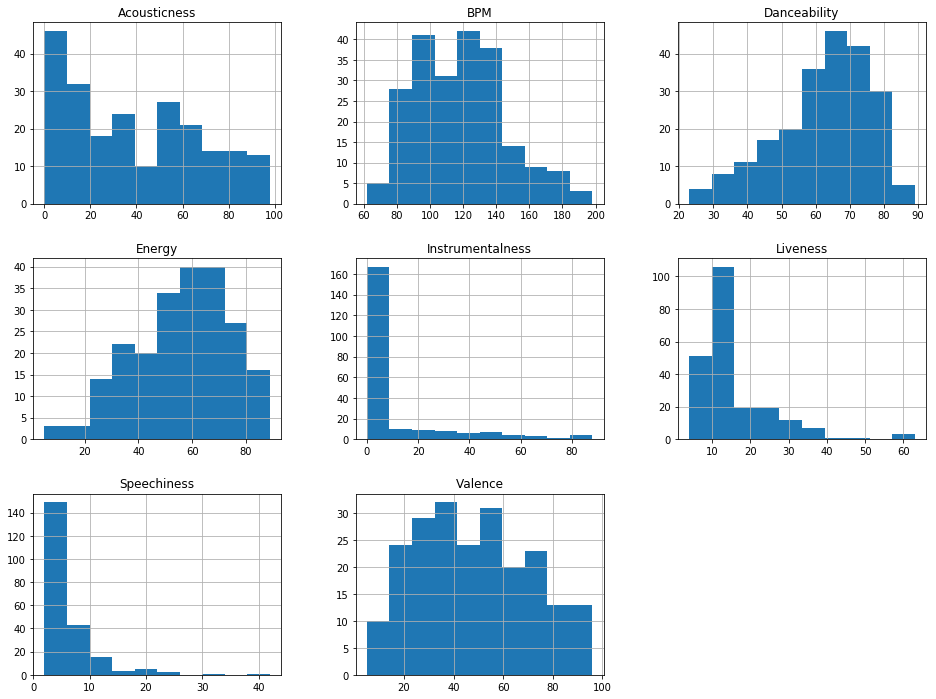

In [17]:
numerics_fr.hist(figsize=(16,12));

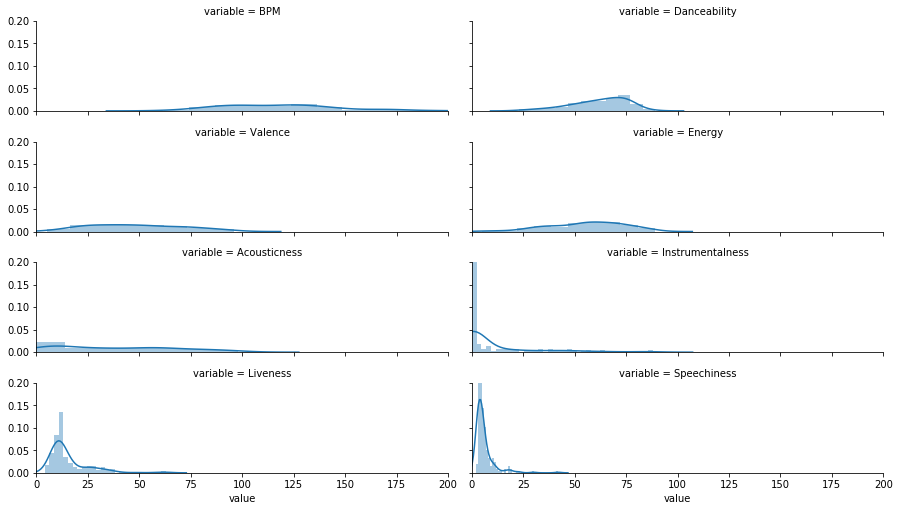

In [18]:
dfm = numerics_fr.melt(var_name='variable')
g = sns.FacetGrid(dfm, col='variable', col_wrap=2, height=1.8, aspect=3.5, ylim=(0, 0.2), xlim=(0, 200))
g = (g.map(sns.distplot, 'value'))

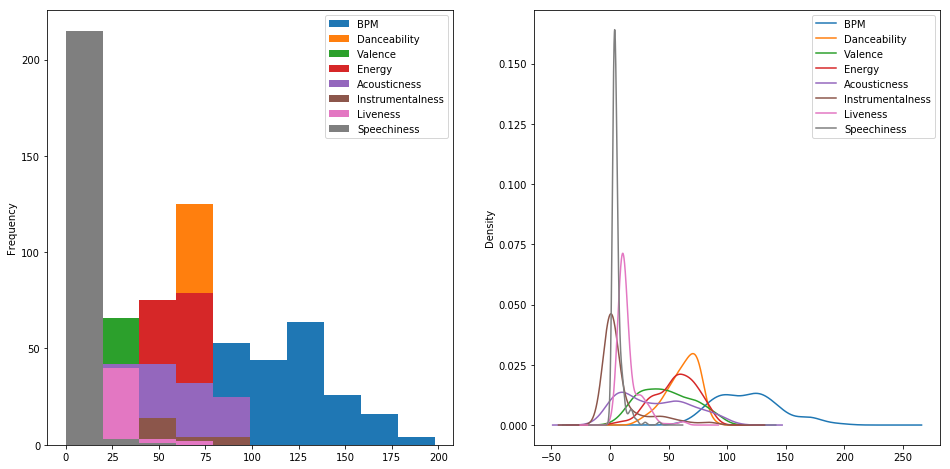

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(16,8))
numerics_fr.plot(kind="hist", ax=ax[0]);
numerics_fr.plot(kind="kde", ax=ax[1]);

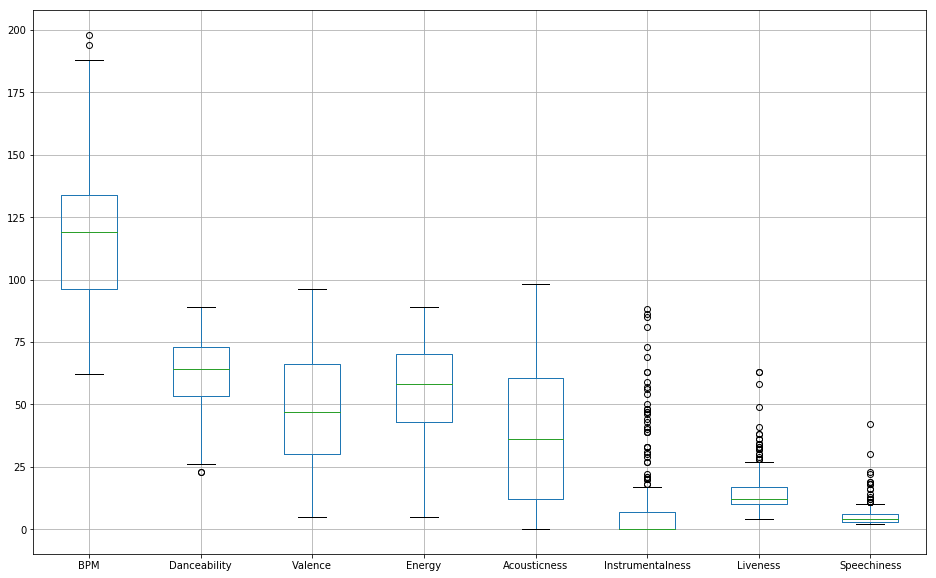

In [20]:
numerics_fr.boxplot(figsize=(16,10));

In [21]:
# Le tracé des boîtes à moustaches révèle :
# - une distribution symétrique pour les variables Danceability, Energy et Valence (moyenne et médiane sont proches)
# Eventuels prétraitements : BPM, Speechiness
# ax = sns.distplot(numerics['BPM'])

#### 2.1.2 Attributs catégoriques

In [22]:
def get_categories(data, playlist):
    return data[playlist].select_dtypes(exclude=[np.number]).iloc[:,-2:]

In [23]:
categories_fr = get_categories(playlists, 'fr')

##### Résumé numérique

In [24]:
categories_fr.describe()

,Key,Mode
count,219,219
unique,12,2
top,C,Minor
freq,37,121


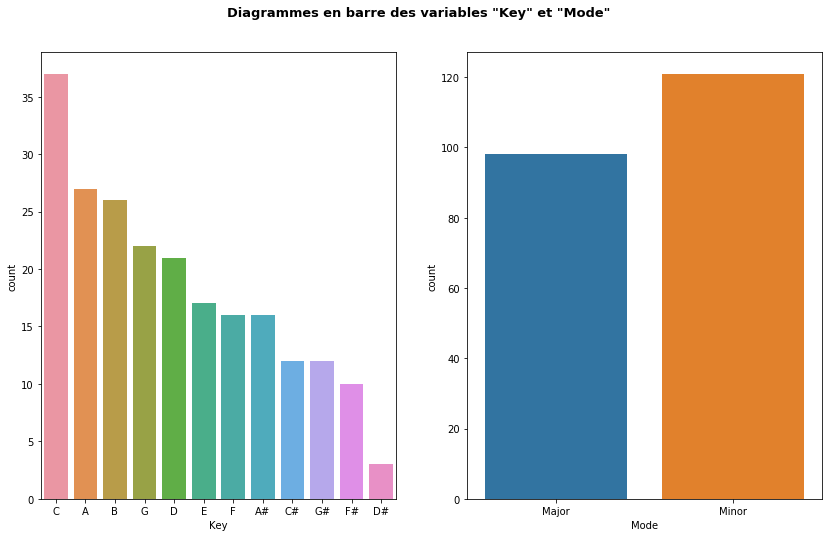

In [25]:
fig, ax = plt.subplots(ncols=2, figsize=(14,8))
sns.countplot(categories_fr['Key'], ax=ax[0], order=categories_fr['Key'].value_counts().index);
sns.countplot(categories_fr['Mode'], ax=ax[1]);
fig.subplots_adjust(top=0.9)
fig.suptitle('Diagrammes en barre des variables "Key" et "Mode"', fontsize=13, fontweight='bold');

### 2.2 Analyse bivariée

#### 2.2.1 Attributs numériques

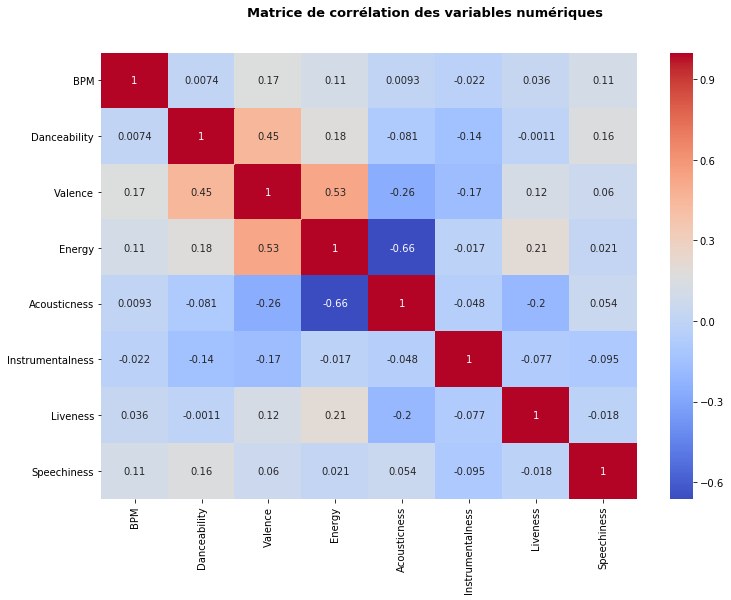

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
hm = sns.heatmap(data=numerics_fr.corr(), ax=ax, cmap="coolwarm", annot=True)
fig.subplots_adjust(top=0.9)
fig.suptitle('Matrice de corrélation des variables numériques', fontsize=13, fontweight='bold');

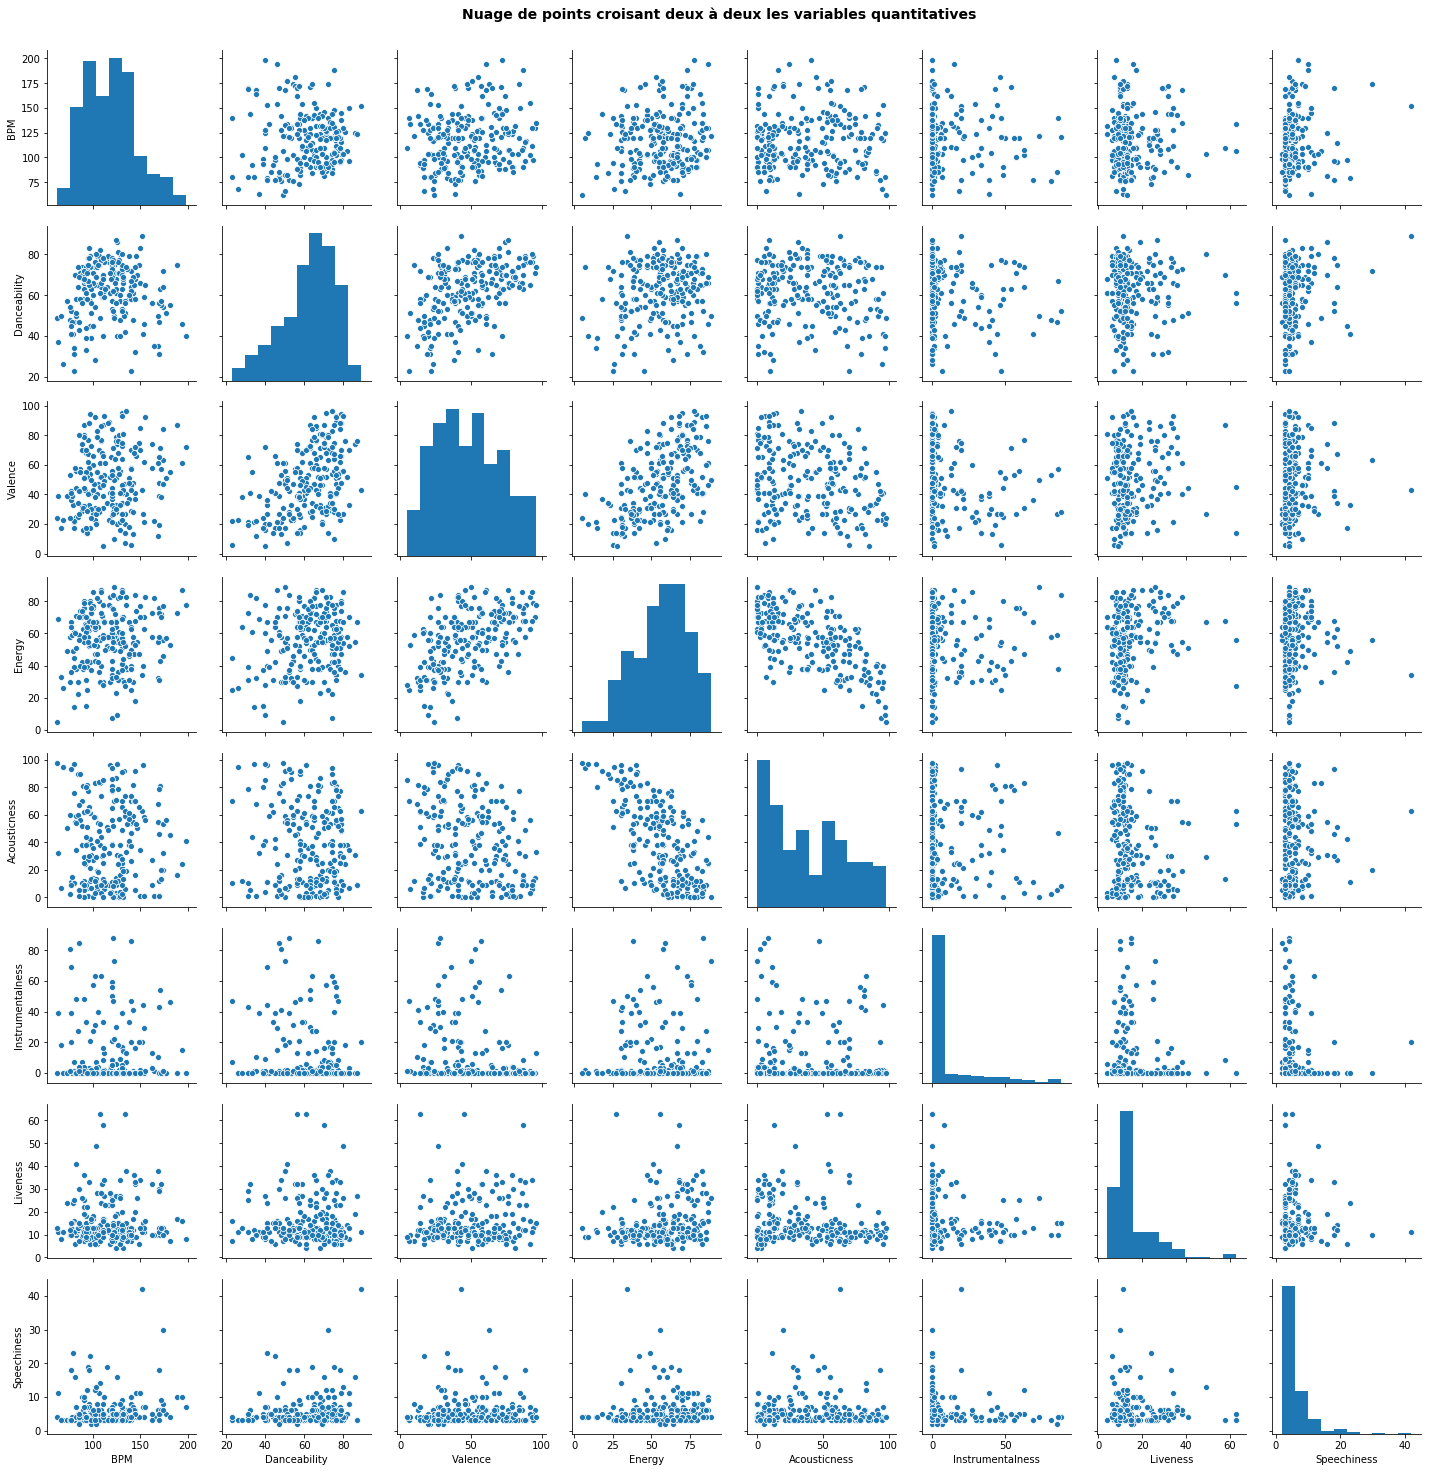

In [27]:
g = sns.pairplot(numerics_fr);
g.fig.suptitle('Nuage de points croisant deux à deux les variables quantitatives', fontsize=14, fontweight='bold', y=1.02);

#### 2.2.2 Attributs catégoriques

In [28]:
# Transformer les attributs catégoriques en attributs numériques et analyser les corrélations

In [29]:
### 2.3 Profil de la chanson type moyenne

### 2.3 Profil type moyen d'une chanson, meilleurs ranking et évolution temporelle du ranking

In [30]:
num_vars = ['BPM', 'Danceability', 'Valence', 'Energy', 'Acousticness', 'Instrumentalness', 'Liveness', 'Speechiness']

#### 2.3.1 Profil moyen de la chanson d'une playlist

_Déterminez pour chaque playlist le prol de la chanson moyenne sur les 10 variables, et
identifiez quelques morceaux qui s'en rapprochent le plus possible._

##### Variables numériques

In [31]:
num_means = {}
for p in playlist_names:
    num_means[p] = get_numerics(playlists, p).mean().to_frame().T
    num_means[p].reset_index(drop=True, inplace=True)

##### Variables catégoriques

In [32]:
cat_proportions = {}
for p in playlist_names:
    cat_proportions[p] = get_categories(playlists, p).describe().T['top'].to_frame().T
    cat_proportions[p].reset_index(drop=True, inplace=True)

##### Calcul des profils moyens et distances à la moyenne (ommission des variables catégoriques)

In [33]:
most_similar = {}
for p in playlist_names:
    distances = scipy.spatial.distance.cdist(num_means[p], playlists[p].select_dtypes(include=[np.number])[num_vars], metric='euclidean')
    distances_df = pd.DataFrame(distances).T
    distances_df.rename(columns={distances_df.columns[0]:'distance'}, inplace=True)
    min_dist = distances_df.nsmallest(3, 'distance').index.tolist()
    most_similar[p] = playlists[p].loc[min_dist][['title', 'artists']]

##### Trois premières chansons les plus représentatives (par playlist)

In [34]:
for p in playlist_names:
    print('\nPlaylist : {}'.format(p))
    for t, a in zip(most_similar[p]['title'], most_similar[p]['artists']):
        print('{} de {}'.format(t, a))


Playlist : fr
Mojo de Claire Laffut
Au sud de la banlieue nord de Benjamin Paulin
Les filles d'aujourd'hui - Brigitte fontaine de Blondino

Playlist : jazz
Good Morning.Goodbye de Dan Cray Trio
Vid Frösö kyrka (At Frösö Church) - From Frösöblomster (Frösö Flowers) (arr. J. Ekberg, P.V. Johansson and L. Simonsson) de Trio X of Sweden
After All de Joost Lijbaart, Yuri Honing Acoustic Quartet, Gulli Gudmundsson, Wolfert Brederode

Playlist : lovepop
imagine de Ariana Grande
Can I Be Him de James Arthur
For The Love de Hearts & Colors

Playlist : electro
Rising de Jiggler
Belize de Anja Schneider
Bamboo de Marcus Meinhardt

Playlist : metal
Chop Suey! de System Of A Down
Adrenalize de In This Moment
Concrete Jungle de Black Label Society


##### Exemple détaillé de la chanson 'Good Morning.Goodbye', la plus représentative de la playlist 'jazz'

In [35]:
# Grille de référence
num_means['jazz']

,BPM,Danceability,Valence,Energy,Acousticness,Instrumentalness,Liveness,Speechiness
0,105.123894,44.0,17.495575,13.707965,90.513274,61.690265,15.318584,3.946903


In [36]:
# Données numériques
playlists['jazz'].loc[playlists['jazz']['title']=='Good Morning.Goodbye'][num_vars]

,BPM,Danceability,Valence,Energy,Acousticness,Instrumentalness,Liveness,Speechiness
73,100,42,11,11,87,59,10,4


##### Conversion des variables catégoriques en variables numériques

In [37]:
#playlists['fr']['Mode'] = playlists['fr']['Mode'].map({'Major':1, 'Minor':0})
#key_vars = pd.get_dummies(playlists['fr'], columns=['Key'])
# avg_profiles[g] = pd.concat([cat_proportions[g], num_means[g]], axis=1)

#### 2.3.2 Chansons et artistes les mieux classés

_Déterminez pour chaque playlist la chanson (ou l'artiste) qui est la mieux classée d'après
les données, au sens de la position moyenne._

In [38]:
for p in playlists:
    top_ranked = playlists[p]['av_position'].idxmin()
    print('Playlist {} : {} de {} (#{})'.format(p, playlists[p].loc[top_ranked]['title'],
                                                playlists[p].loc[top_ranked]['artists'],
                                                playlists[p].loc[top_ranked]['av_position'].astype(int)))

Playlist metal : Hail to the King de Avenged Sevenfold (#3)
Playlist jazz : Infant Eyes de Fred Hersch Trio (#1)
Playlist electro : Purple Noise de Boris Brejcha (#3)
Playlist lovepop : imagine de Ariana Grande (#1)
Playlist fr : Coco Câline de Julien Doré (#3)


#### 2.3.3 Visualisation temporelle

_Pour une chanson et la playlist de votre choix, visualisez l'évolution temporelle de la position._

In [157]:
def display_time_evolution(genre, track):
    by_genre[genre].loc[by_genre[genre]['title']==track]
    by_date = by_genre[genre].loc[by_genre[genre]['title']==track].sort_values('date')
    
    fig, ax = plt.subplots(figsize=(16,10))
    plt.plot(by_date['date'], by_date['position']);
    fig.suptitle('Evolution temporelle de la position de la chanson {}'.format(track), y=0.93, fontweight='bold')
    ax.set_xlabel('date', fontsize=13, labelpad=30);
    ax.set_ylabel('position', fontsize=13, labelpad=30)
    plt.xticks(ticks = by_date['date'][::2], labels=by_date['date'][::2], rotation='vertical');

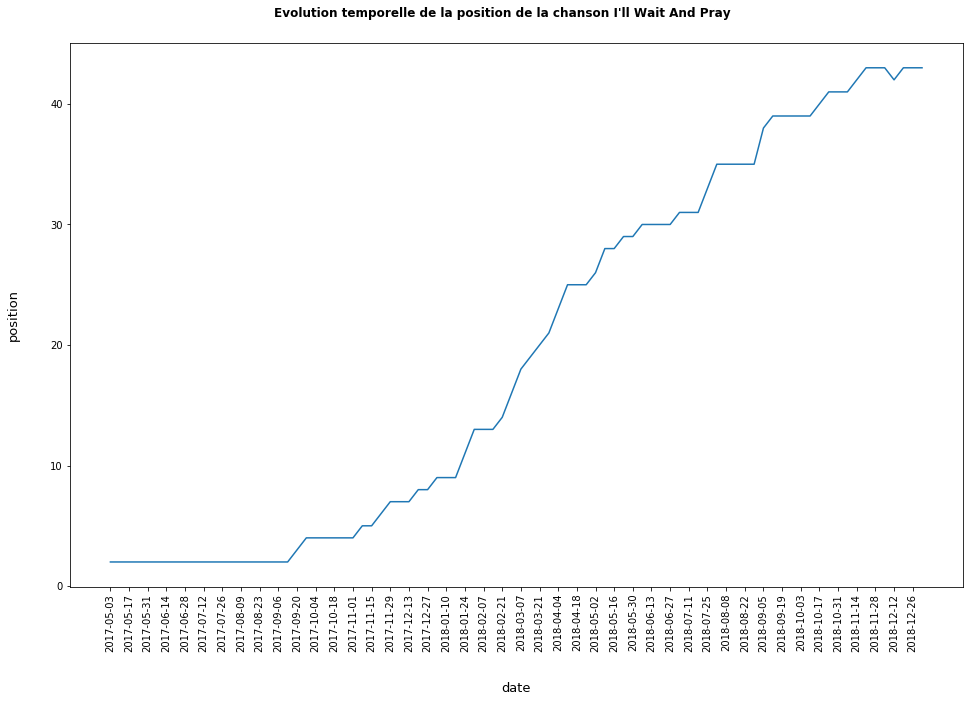

In [158]:
display_time_evolution('jazz', 'I\'ll Wait And Pray')

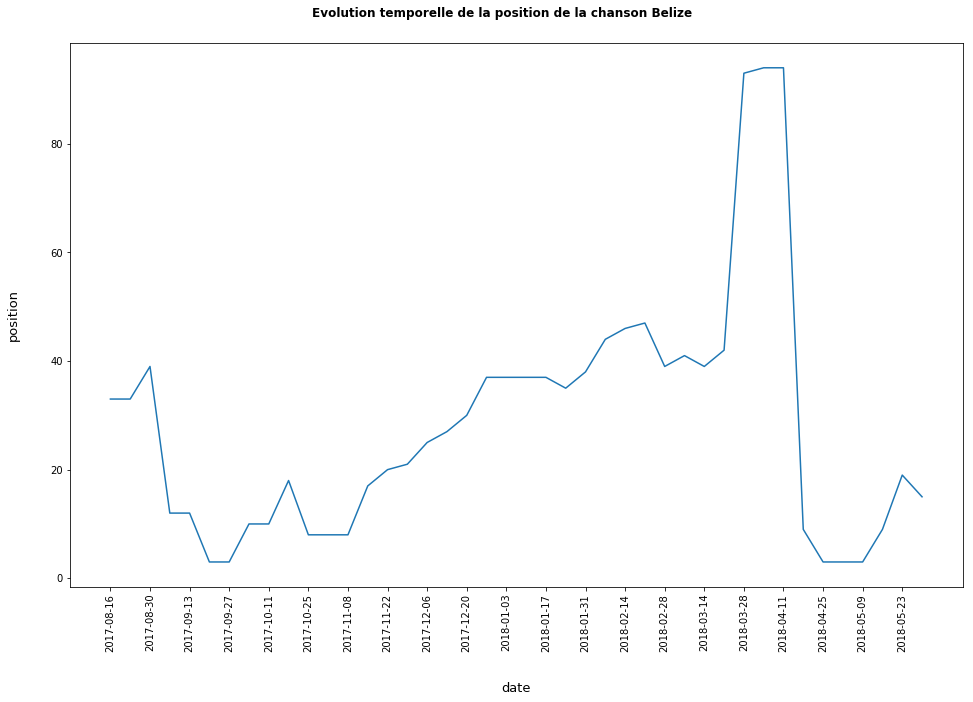

In [159]:
display_time_evolution('electro', 'Belize')

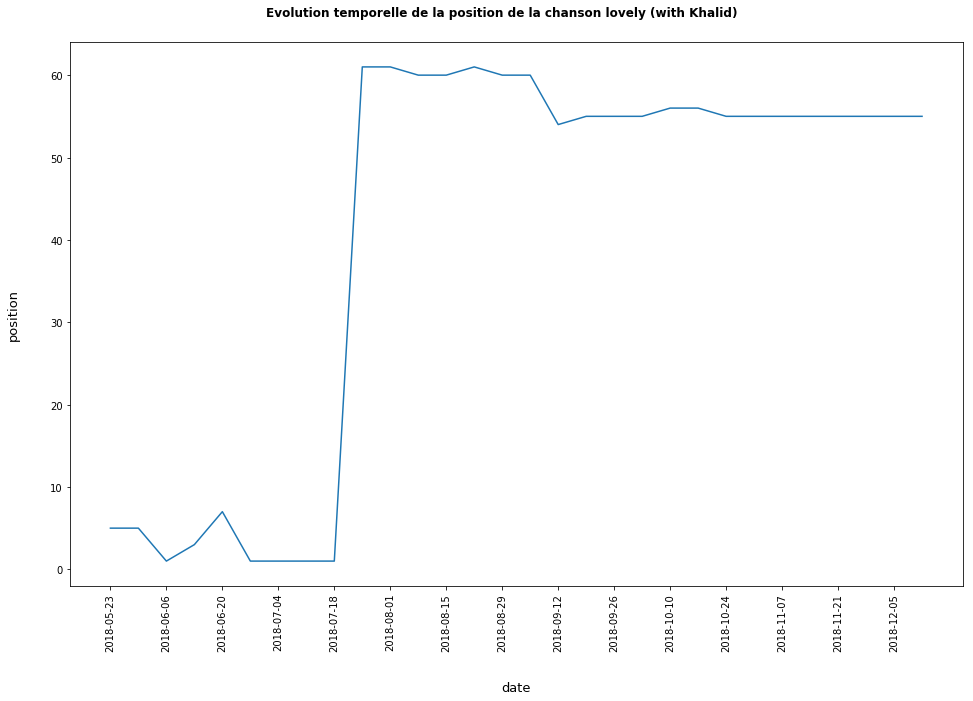

In [160]:
display_time_evolution('lovepop', 'lovely (with Khalid)')

### 2.3 Analyse exploratoire multidimensionnelle

_Pour la totalité des playlists, appliquez une méthode de réduction de dimension (ACP, t-
SNE, MDS...) sur les chansons décrites par leurs 10 variables, puis projetez les chansons dans
un plan. Interprétez. Isolez quelques chansons atypiques ( outliers ) pour chaque playlist._